Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [1]:
using Statistics
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib.rcParams[:"svg.image_noscale"]=false

false

In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

vamos a usar 3R7 (Evocado) para las gráficas evocadas.

In [3]:
arxlfp="../JLDFiles/Evocada/LFPDesaturado_3R7.jld"

LFPSaturado=load(arxlfp, "LFPSaturados")
LFPPlanchado=load(arxlfp, "LFPDenoized")

Dict{AbstractString,Array} with 3 entries:
  "Trancazo_2" => [23.0 22.1558 … 28.1982 32.2266; -10.0708 -56.3965 … -20.1416…
  "Trancazo_1" => [-25.0 -18.1274 … -16.1133 -18.1274; -6.04248 -70.4956 … -2.0…
  "Trancazo_3" => [-12.0 -14.0991 … -46.3257 6.04248; 0.0 -10.0708 … -28.1982 1…

In [4]:
nmax=248 #la actividad respuesta se muere poco antes de este cuadro.
(alto, ancho, nn)=size(LFPPlanchado["Trancazo_3"])

(64, 64, 457)

In [5]:
LFPProm=LFPPlanchado["Trancazo_1"]+LFPPlanchado["Trancazo_2"]+LFPPlanchado["Trancazo_3"]
LFPProm/=3;

Dice Rafael que el F siempre no, que no lo pongamos

In [6]:
puntox=[36,36,36,36,36,36]
puntoy=[6,9,12,15,18,21]
puntol=["f","e", "d", "c", "b","a"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([puntox[2],puntox[end]],[puntoy[2],puntoy[end]])
length(muchasx)

13

In [7]:
xizq=24
xder=48
ybajo=6
yalto=30
tiemposinteresantes=(28,63,70,77,84,91,95,98,105)
retraso=35
freq=7.022 # kHz (por alguna razon no en los archivos!!!)

7.022

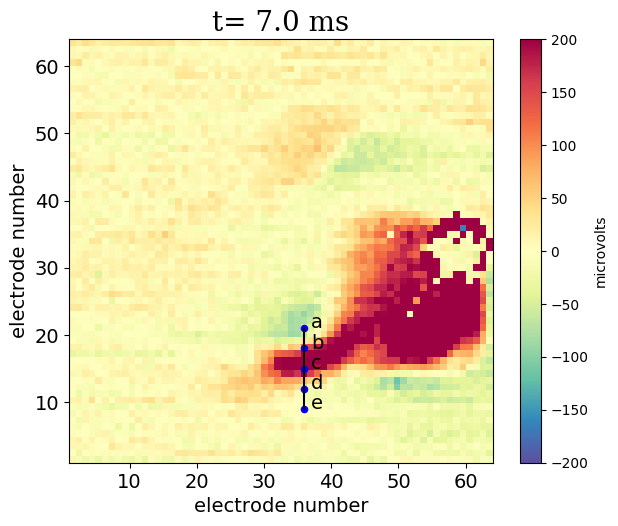

PyObject Text(29.000000000000007, 0.5, 'electrode number')

In [11]:
cuadro=84
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-retraso)/freq; digits=1)

title("t= $milisec ms", fontdict=font1)
limites=200
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

for punto in 2:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="Spectral_r", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

#scatter(muchasx,muchasy, marker="o", s=20, c="b")

scatter(puntox[2:end],puntoy[2:end], marker="o", s=20, c="b")


#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")

#Dice Rafael que quitemos el F

plot([puntox[2], puntox[end]], [puntoy[2], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx.set_label("microvolts") #okey, no hay consenso de cuando es dot overloading y cuando es [:esto]
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("LFP_Promedio_3R7-2-$cuadro.svg", dpi=90)

Dice Rafael que quitemos el Punto F y hagamos mas chiquito el Cuadro...

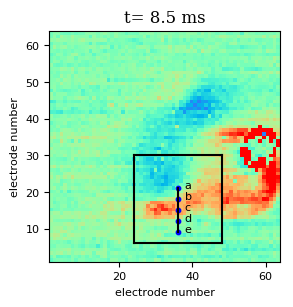

In [12]:
ion()

cuadro=95
exdesaturado=LFPProm[:,:,cuadro];
figure(figsize=(3.0,3.0))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>12)
milisec=round((cuadro-retraso)/freq, digits=1)

title("t= $milisec ms", fontdict=font1)
limites=150
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)


imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)


plot([xizq, xder], [ybajo, ybajo], "k-")
plot([xizq, xder], [yalto, yalto], "k-")
plot([xizq, xizq], [ybajo, yalto], "k-")
plot([xder, xder], [ybajo, yalto], "k-")

for punto in 2:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=8)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end
scatter(puntox[2:end],puntoy[2:end], marker="o", s=10, c="b")
plot([puntox[2], puntox[end]], [puntoy[2], puntoy[end]], "k-")


#cbx=colorbar(imagen, fraction=0.045) 
#cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=8, direction="out")

xlabel("electrode number", fontsize=8)
ylabel("electrode number", fontsize=8)

savefig("LFPConCuadroParaDiagrama-$cuadro.svg",dpi=90)

In [29]:
SubDatLFP=getindex(LFPProm, ybajo:yalto,xizq:xder,1:nmax);
SubDatCSD=getindex(CSDPlanchadoPromedio, ybajo:yalto,xizq:xder,1:nmax);


In [10]:
ioff()
for t=retraso:(retraso+2) # nmax
 figura=figure(figsize=(7.0,5.5))
    imagen=imshow(SubDatLFP[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-200,vmax=200, extent=(xizq,xder,ybajo,yalto),cmap="plasma")
 cbx=colorbar(imagen, fraction=0.045) 
    
    savefig("EvocadoPeli-$t.png",dpi=92)
    close(figura)
end
close()

In [14]:
ion()
tiempo=1:nmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(1.2,6*0.7))

for j=1:6
    xlim(-5,30)
    ylim(-400,400)
    lista[j].axis("off")
    lista[j].plot((tiempo.-retraso)./freq,vec(LFPProm[puntoy[7-j],puntox[7-j],tiempo]),
    linewidth=1.0)
    lista[j].annotate(puntol[7-j],xy=(-20,100), annotation_clip=false, fontsize=10)
end
lista[6].plot([25,30],[-330,-330], lw=2, c="k")
lista[6].annotate("5 ms", xy=(26,-300), fontsize=10)

lista[6].plot([25,25],[-330,-130], lw=2, c="k")
lista[6].annotate("200 µV", xy=(10,-230), fontsize=10)


savefig("PotencialesEvocadosSeleccionados_3R7.svg", dpi=96)
close()

In [15]:
arxcsd="../JLDFiles/Evocada/CSDEvocada_3R7.jld"
CSD=load(arxcsd, "CSD")
CSDPlanchado=load(arxcsd, "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];
CSDPlanchadoPromedio/=3.0;

In [16]:
arxcm="../JLDFiles/Evocada/CSDEvocada_3R7-CM.jld"
cmp=load(arxcm, "CMP")
cmn=load(arxcm, "CMN");

In [17]:
tiempo=1:nmax
t=700

farofa, lista=subplots(6, sharex=true, sharey=true, figsize=(1.2,6*0.7))

for j=1:6
    xlim(-5,30)
    ylim(-200,200)
    lista[j].axis("off")
    lista[j].plot((tiempo.-retraso)/freq,vec(CSDPlanchadoPromedio[puntoy[7-j],puntox[7-j],tiempo]),
    linewidth=1.0, c="red")
    lista[j].axhline(0, color="black",lw=1.0)
    lista[j].annotate(puntol[7-j],xy=(-20,100), annotation_clip=false, fontsize=10)
end

close()
#savefig("CSDEvocadosSeleccionados_3R7.svg", dpi=96)

In [ ]:
tiempo=1:nmax
t=700


farofa, lista=subplots(15,15, sharex=true, sharey=true, figsize=(15,6*2.5))

for j=1:15,k=1:15
    xlim(-5,30)
    ylim(-400,400)
    yys=vec(SubDatos[j,k,tiempo])
    xxs=(tiempo.-retraso)/freq
    rojo=maximum(yys[70:nmax])/400
    if rojo>1
        rojo=0.99
    end
    lista[16-j,k].axis("off")
    lista[16-j,k].plot(xxs,yys, color=(rojo,0,0), lw=0.5)

end

lista[14,14].plot([25,30],[-330,-330], lw=1.5, c="k")
lista[14,14].annotate("5 ms", xy=(26,-300), fontsize=8)

lista[14,14].plot([25,25],[-330,-130], lw=1.5, c="k")
lista[14,14].annotate("200 µV", xy=(0,-230), fontsize=8)

savefig("MuchosTrazosSubMatrixView01.svg",dpi=92)
close()

In [18]:
arregloparacascadaLFP=zeros(length(muchasx),nmax);
for j in 1:length(muchasx)
    arregloparacascadaLFP[j,:]=LFPProm[muchasy[j],muchasx[j],1:nmax]
end

In [23]:
figure(figsize=(12,6))
xlim(0,nmax+1)
limites=100
ylim(-limites,limites)

#exdesaturado=DatosCentrados["Trancazo_2"][:,:,140];
#imagen=imshow(exdesaturado, origin="lower", interpolation="nearest", cmap="rainbow", vmin=-limites,vmax=limites)
promedio=zeros(nmax)
k=0
xx=1:nmax
for j in 1:length(muchasx)
    yy=vec(arregloparacascadaLFP[j,:]).-30*j.+300
    promedio+=yy
    plot(xx,yy, c=(j/21,1-j/21,0))
    k+=1
end
#plot(1:tmax, promedio, c="black")   
#promedio=promedio/k
#plot(1:tmax, promedio, c="black")   
close()

In [54]:
limites=200
fag, gaf=subplots(figsize=(12,6))
#The density plot
gaf[:set_xlim](1,nmax)
gaf[:set_ylim](20.5,0)
imagen=gaf[:imshow](arregloparacascadaLFP, cmap="rainbow", 
vmin=-limites, vmax=limites, interpolation="sinc")
tiempoestampas=gaf[:axes][:get_xticks]()


gaf[:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[:annotate]("5ms", (20.5,23))
gaf[:plot]([2,2],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (10,14))


#Some vertical lines
gaf[:plot]([36,36],[23,-2], c="0.2", ls="--", lw=2)
#gaf[:plot]([40,40],[23,-2], "r-", lw=4)
gaf[:annotate]("Stimulus", (37,22), fontsize=16)


#adjust aspcet ratioo
gaf[:axes][:set_aspect](3.7)
print(tiempoestampas)
ts2=map(x->round((x-36)/7.0224,digits=1), tiempoestampas)
gaf[:axes][:set_xticklabels](ts2)
#gaf[:set_yticks]((puntoy-12)*1.25)
#gaf[:set_yticklabels](puntol)
gaf[:axis]("off")


#colorbar
cbx=colorbar(imagen, fraction=0.016)
cbx[:set_label]("µV")

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-800,800)
ga2[:set_xlim](1,tmax)

#=
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[20,1:tmax])-400, "-", linewidth=0.6, color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[15,1:tmax])-250, "-", linewidth=0.6, color="0.3")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[11,1:tmax])-45, "-", linewidth=0.6 , color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[8,1:tmax])+160, "-", linewidth=0.6, color="0.3")
ga2[:plot](1:tmax, vec(arregloparacascadaLFP[4,1:tmax])+295, "-", linewidth=0.6, color="0.3")
ga2[:plot]((1:tmax), vec(arregloparacascadaLFP[1,1:tmax])+430, "-", linewidth=0.6,color="0.3")

ga2[:plot]([tmax-2,tmax-2],[-300,0], c="0.3", lw=2)
ga2[:annotate]("300 µV", (tmax-20,-120))
ga2[:axis]("off")


ga2[:annotate](puntol[1],xy=(-3,-400), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[2],xy=(-3,-250), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[3],xy=(-3,-45), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[4],xy=(-3,160), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[5],xy=(-3,295), annotation_clip=false, fontsize=18)
ga2[:annotate](puntol[6],xy=(-3,430), annotation_clip=false, fontsize=18)

=#
#savefig("LFP_espaciotiempo_3R7_promedio-rainbow.svg",dpi=96)


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:3
└ @ Core In[54]:3
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:5
└ @ Core In[54]:5
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:6
└ @ Core In[54]:6
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:8
└ @ Core In[54]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of 

[0.0, 50.0, 100.0, 150.0, 200.0, 250.0]

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:27
└ @ Core In[54]:27
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:27
└ @ Core In[54]:27
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:28
└ @ Core In[54]:28
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:35
└ @ Core In[54]:35
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in f

UndefVarError: UndefVarError: tmax not defined

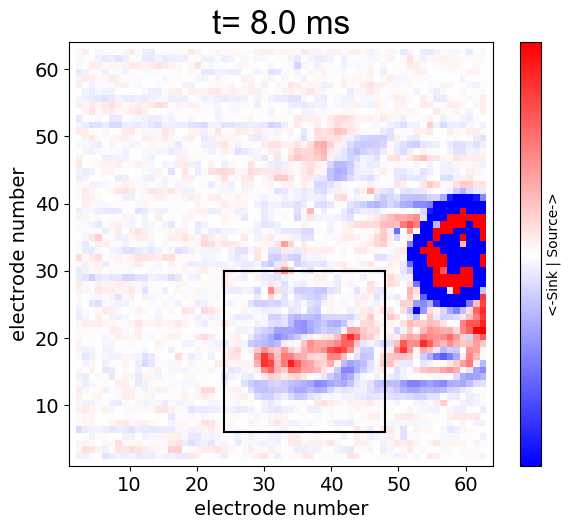

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[25]:35
└ @ Core In[25]:35


PyObject Text(29.000000000000007, 0.5, 'electrode number')

In [25]:
ion()
cuadro=91
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"Arial",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)
milisec=round((cuadro-retraso)/freq,digits=1)

title("t= $milisec ms", fontdict=font1)
limites=50
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

imagen=imshow(excsd, 
interpolation="nearest", cmap="bwr", origin="lower", 
    vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

    
#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([xizq, xder], [ybajo, ybajo], "k-")
plot([xizq, xizq], [ybajo, yalto], "k-")
plot([xizq, xder], [yalto, yalto], "k-")
plot([xder, xder], [ybajo, yalto], "k-")

#plot(puntox,puntoy)

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
cbx[:set_label]("<-Sink | Source->")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

#savefig("CSD_3R7-promedio-$cuadro.svg", dpi=90)

In [26]:
arxcat="../JLDFiles/CMNuevos/Catenarios4AP-Promedio-3.jld"
CatenarioPositivo=load(arxcat, "CatenarioPositivo")
CatenarioNegativo=load(arxcat, "CatenarioNegativo");

ErrorException: File ../JLDFiles/CMNuevos/Catenarios4AP-Promedio-3.jld cannot be found

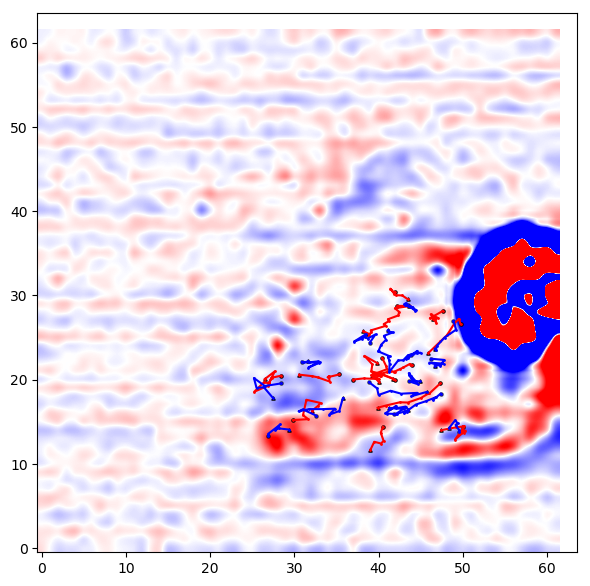

In [46]:
ion()
cuadro=95
excsd=CSDPlanchadoPromedio[:,:,cuadro];

figure(figsize=(6,6))
#axis("equal")
#tick_params(labelbottom="off", labelleft="off")
xlim(-0.50,63.5)
ylim(-0.5,63.5)
vlim=80
bolitasrojas=0
bolitasazules=0
minlargo=5
marcagor=5
muevemin=0.5
tight_layout()

guacafondo=imshow(excsd, cmap="bwr", interpolation="spline16", origin="lower", vmin=-vlim, vmax=vlim)

for p in CatenarioPositivo
    gordura=abs.(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32,p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)> marcagor && (desviax>muevemin || desviay>muevemin) && longus> minlargo 
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1].+xizq
        yypos=p[:,2].+ybajo    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="r")
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="red", marker="o" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor="red", marker="^", label="Final" )
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
       # annotate(round(tiempos[end]*1000,1), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end




for p in CatenarioNegativo
    gordura=abs.(map(Float32,p[:,3]))
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    longus,falsus=size(p)
    if mean(gordura)>marcagor && (desviax>muevemin || desviay > muevemin) &&longus> minlargo
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1].+xizq
        yypos=p[:,2].+ybajo    
        tiempos=p[:,4]./7022    
        plot(xxpos, yypos, marker="o", markersize=1, color="b")
        #bolitasazules=scatter(xxpos,yypos, s=gordura,
        #edgecolors="none", color="b")
        inicios=scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", alpha=0.7, marker="o", label="Final" )
        finales=scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor="blue", marker="^", label="Final" )
      #  annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
      #  annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#colorbar(bolitasrojas, fraction=0.046)
#colorbar(bolitasazules, fraction=0.052, ticks=[])

savefig("TrayectoriaEvocadaPromedio_3R7-Cuadro.svg", dpi=90)

In [30]:

font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
"size"=>16)
limcsd=60


for t=42:70:3 #tmax


 figure(figsize=(7.0,5.5))
 
    
 milisec=round((t-35)/7.022,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatos[:,:,t], origin="lower", 
        interpolation="nearest", 
        vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
 cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
 cbx[:set_label]("<-Sink | Source->")
   
 savefig("CSDEvocadoPeliNew-$t.png",dpi=92)
close()
end



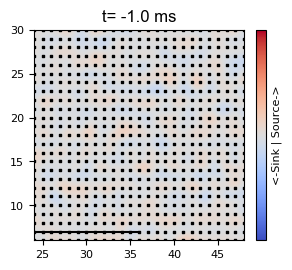

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[32]:22
└ @ Core In[32]:22


In [32]:

font1 = Dict("family"=>"Arial",
    "color"=>"black",
    "weight"=>"normal",
"size"=>12)
limcsd=60

#for t in tiemposinteresantes
t=28
 figure(figsize=(3.0,3.0))    
    xlim(xizq,xder)
    ylim(ybajo,yalto)
    milisec=round((t-retraso)/freq,digits=1)

 title("t= $milisec ms", fontdict=font1)
    imagen=imshow(SubDatCSDSD[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-limcsd,vmax=limcsd, extent=(xizq,xder,ybajo,yalto),cmap="coolwarm")
    
    tick_params(labelsize=8, direction="out")
        
    cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
    cbx[:set_label]("<-Sink | Source->", fontsize=8)
    plot([xizq, xizq+12],[ybajo+1,ybajo+1],color="black")

    
xele=xizq:xder
yele=ybajo:yalto
    
for xi in xele, yi in yele
    scatter(xi,yi, s=1, color="black", marker="s")
end

   # tight_layout()
    savefig("CSDEvocado-$t.svg",dpi=92)


#end

In [34]:
(muchasx,muchasy)=ListaPixelesdeLinea([puntox[2],puntox[end]],[puntoy[2],puntoy[end]])
# Las originales estan arriba: intentemos con otras "de lado".
#primal=["F'","E'", "D'", "C'", "B'","A'"];
#(muchasx,muchasy)=ListaPixelesdeLinea([31,42],[3,23])
arregloparacascadaCSD=zeros(length(muchasx),nmax);
for j in 1:length(muchasx)
    arregloparacascadaCSD[j,:]=CSDPlanchadoPromedio[muchasy[j],muchasx[j],tiempo]
end

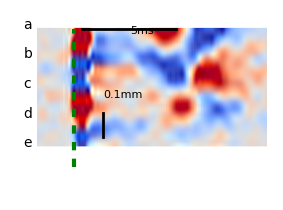

In [20]:
figure(figsize=(3,3))
limites=80
xlim(-15,71)
imagen=imshow(arregloparacascadaCSD, cmap="coolwarm", interpolation="sinc", 
extent=[-35,tmax-retraso,puntoy[2],puntoy[end]], origin="lower", vmin=-limites,vmax=limites)
axis("off")
imagen[:axes][:set_aspect](3.7)
#tick_params(axis="both", right="off", labelleft="off", labelbottom="off")
for y in 2:6
    annotate(puntol[y], xy=(-20,puntoy[y]), annotation_clip=false, fontsize=10)
end


#plot([2,37.1],[21,21], "k-", lw=2)
#annotate("5ms", (20.5,23))
plot([10,10],[10,12.4], "k-", lw=2, clip_on="False")
annotate("0.1mm", (10,14),fontsize=8)

plot([2,37.1],[21,21], "k-", lw=2)
annotate("5ms", (20,20.5), fontsize=8)

plot([-1,-1],[7,21],lw=3,ls="--", color="green")
tight_layout()

#savefig("CSDEspacioTemporal01.svg", dpi=90)


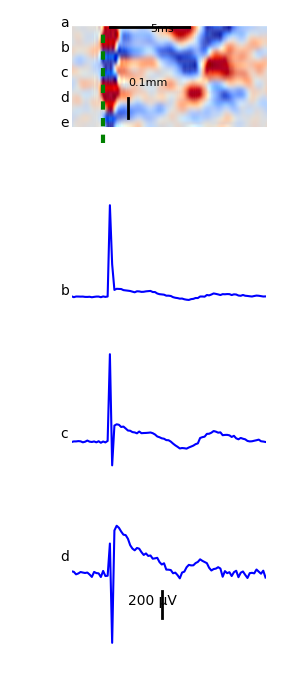

In [20]:

limites=80

fag, gaf=subplots(4, figsize=(3,7), sharex=true)

xlim(-15,71)


imagen=gaf[1][:imshow](arregloparacascadaCSD, cmap="coolwarm", interpolation="sinc", 
extent=[-35,tmax-retraso,puntoy[2],puntoy[end]], origin="lower", vmin=-limites,vmax=limites)
imagen[:axes][:set_aspect](3.7)
for y in 2:6
    gaf[1][:annotate](puntol[y], xy=(-20,puntoy[y]), annotation_clip=false, fontsize=10)
end

gaf[1][:plot]([10,10],[10,12.4], "k-", lw=2, clip_on="False")
gaf[1][:annotate]("0.1mm", (10,14),fontsize=8)

gaf[1][:plot]([2,37.1],[21,21], "k-", lw=2)
gaf[1][:annotate]("5ms", (20,20.5), fontsize=8)

gaf[1][:plot]([-1,-1],[7,21],lw=3,ls="--", color="green")

gaf[1][:axis]("off")


for j=2:4
gaf[j][:plot]((-15:71),vec(LFPProm[puntoy[7-j],puntox[7-j],20:106]),
    linewidth=1.5, c="blue")
    gaf[j][:annotate](puntol[7-j],xy=(-20,100), annotation_clip=false, fontsize=10)
    #gaf[j][:axhline](0, color="blue",lw=1.0)
    gaf[j][:axis]("off")
end

gaf[4][:plot]([25,25],[-330,-130], lw=2, c="k")
gaf[4][:annotate]("200 µV", xy=(10,-230), fontsize=10)
tight_layout()
savefig("CSDWithTraces01.svg",dpi=90)
 

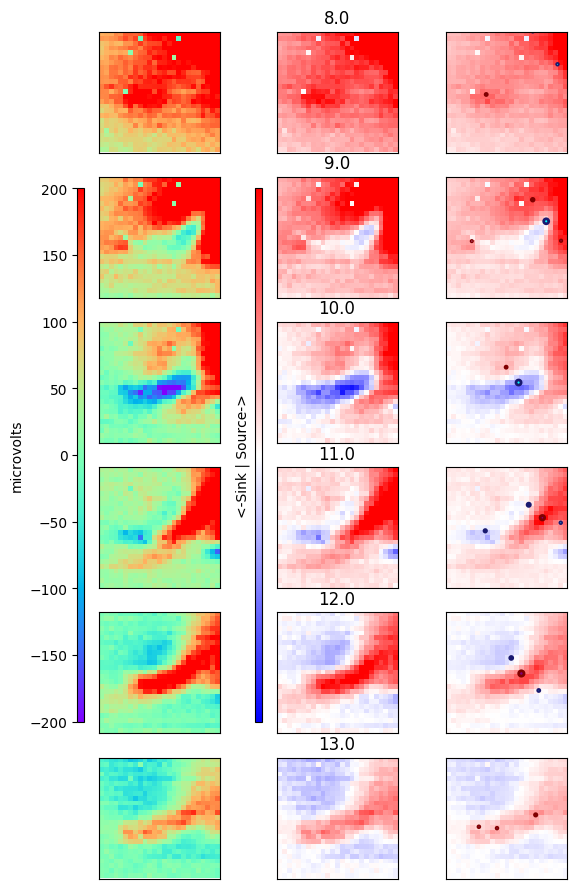

In [57]:
farofa, lista=subplots(6,3, figsize=(6.5,11)) #mas o menos tamano carta

vlim=200
csdlim1=250
csdlim2=400
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])

for j=1:6
    n=35+21+(j-1)*7
  lfp=SubDatLFP[:,:,n]  
  csd=SubDatLFP[:,:,n]  
    tau=round(n/freq, digits=1)
    tit="t= $tau ms"
 imagenlfp=lista[j,1].imshow(lfp, origin="lower", vmin=-vlim, vmax=vlim,
        cmap="rainbow", interpolation="nearest")
 
    
      #uando es dot overloading y cuando es [:esto]
    
 imagencsd=lista[j,2].imshow(csd, origin="lower", vmin=-csdlim1, vmax=csdlim1, 
        cmap="bwr",interpolation="nearest")
 lista[j,2].set_title(tau)

xxpos=cmp[n][:,1]
yypos=cmp[n][:,2]
gorpos=cmp[n][:,3]./400

xxneg=cmn[n][:,1]
yyneg=cmn[n][:,2]
gorneg=abs.(cmn[n])[:,3]./400

    
 lista[j,3].set_xlim([xizq,xder])
 lista[j,3].set_ylim([ybajo,yalto])
    
lista[j,3].imshow(csd, origin="lower", 
        vmin=-csdlim2, vmax=csdlim2, cmap="bwr", 
        interpolation="nearest", extent=[xizq,xder,ybajo,yalto])
lista[j,3].scatter(xxpos, yypos, s=gorpos, c="purple", edgecolor="maroon", lw=2)
lista[j,3].scatter(xxneg, yyneg, s=gorneg, c="cyan", edgecolor="midnightblue", lw=2)

    
    for k=1:3
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])
    end
    

end


 cbxlfp=farofa.colorbar(imagenlfp, ax=lista[:,1], shrink=1.0, 
      location="left", aspect=80, fraction=0.045)
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("microvolts") #okey, no hay consenso de c

 cbxcsd=farofa.colorbar(imagencsd, ax=lista[:,2], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[])
   cbxcsd.set_label("<-Sink | Source->")

savefig("TablaLFPCSDCMSubCA3-Evocada_3R7.svg",dpi=100)

In [41]:
cmn[2]

44×3 Array{Float64,2}:
 29.9394   16.2526      -72.8145
 60.3529   55.5739      -88.8768
 35.9591   54.097     -3347.89  
 61.5859    1.49394     -70.0473
  6.55123  27.5307      -76.2524
 22.5725   31.2912      -45.0105
 54.7805   10.1813      -67.2325
 14.566    58.0366      -59.8429
 21.9949   15.6336      -86.9238
 29.4335   43.3564      -57.8694
 60.4485   27.2215     -118.441 
 42.3112   43.0522      -52.4155
 55.6044    2.20763     -72.2193
  ⋮                             
 25.3334   23.329       -51.1164
 14.5683    1.49985     -55.6847
 45.2924    3.36378    -119.962 
 52.038    59.2915     -134.702 
 45.2917   56.7492     -197.403 
 27.0733   37.8724     -100.453 
 39.0858   26.0        -126.511 
 18.2744   10.0088      -69.5047
 13.677    47.5864      -67.077 
 12.2737   17.3394     -125.409 
 55.8181   30.5403   -17901.3   
 32.742    40.718       -56.0945